### Toy Example -  SVM

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm # import the library

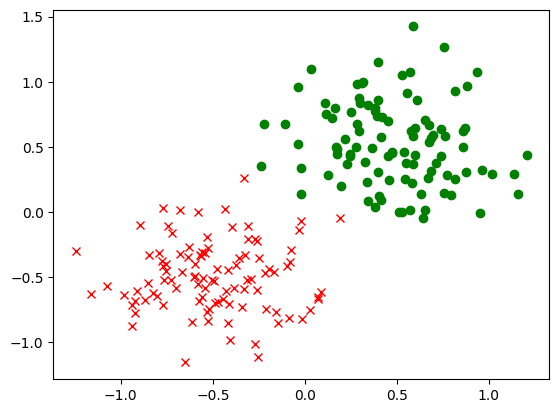

In [9]:
# load toy data
training_data = np.load('data/svm_train_data.npy')
training_labels = np.load('data/svm_train_labels.npy')

# plot the data
for i in range(training_data.shape[0]):
    if training_labels[i] == 0:
        plt.plot(training_data[i, 0], training_data[i, 1], 'og')
    else:
        plt.plot(training_data[i, 0], training_data[i, 1], 'xr')
plt.show()

In [10]:
# train a SVM model
C_param = 100 # change this parameter to [0.01, 1, 10, 1000] and try to explain the effect of the parameter
svm_model = svm.SVC(C_param, "linear") # define the model
svm_model.fit(training_data, training_labels) # train
predicted_labels_train = svm_model.predict(training_data) # predit

X = np.linspace(-1, 1, 1000)
Y = -(X * svm_model.coef_[0, 0] + svm_model.intercept_) / svm_model.coef_[0, 1]
for i in range(training_data.shape[0]):
    if training_labels[i] == 0:
        plt.plot(training_data[i, 0], training_data[i,1],'og')
    else:
        plt.plot(training_data[i, 0], training_data[i, 1],'xr')
        
        
        
# plotting
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')        
        
plt.plot(X,Y) 
plt.show()


TypeError: SVC.__init__() takes 1 positional argument but 3 were given